In [10]:
## Read msisdn's with billing stats
import pandas as pd
import teradatasql
import time 

HOST = '192.168.0.155'
USER = 'mf_rtim' 
PASS = 'mf_rtim'
n_classes = 5

td_conn_prop = '{"host":"' + HOST + \
               '","user":"' + USER + \
               '","password":"' + PASS + '"}'
def execute_sql(sql_script):
    with teradatasql.connect(td_conn_prop) as con:
        with con.cursor() as cur:
            start_t = time.time()

            cur.execute(sql_script)
            df = pd.DataFrame(cur.fetchall(), columns = [i[0] for i in cur.description])

            end_t = time.time()
            print('SQL exec time: %f'% (round(end_t - start_t, 2)))
            return df

In [32]:
def prepare_and_execute_sql(script_path):
    '''Open file with script, replace variable dummies with actual values and execute the script'''
    with open(script_path, 'r') as file:
        sql_script = file.read()
    return execute_sql(sql_script)

In [34]:
SQL_LINE = "DROP TABLE mf_rtim.month_billing_stats"
execute_sql(SQL_LINE)

PATH = "/sql/create_month_billing_stats.sql"

prepare_and_execute_sql(PATH)

OperationalError: [Version 17.0.0.6] [Session 1169] [Teradata Database] [Error 3807] Object 'mf_rtim.month_billing_stats' does not exist.
 at gosqldriver/teradatasql.(*teradataConnection).formatDatabaseError TeradataConnection.go:1138
 at gosqldriver/teradatasql.(*teradataConnection).makeChainedDatabaseError TeradataConnection.go:1154
 at gosqldriver/teradatasql.(*teradataConnection).processErrorParcel TeradataConnection.go:1217
 at gosqldriver/teradatasql.(*TeradataRows).processResponseBundle TeradataRows.go:1662
 at gosqldriver/teradatasql.(*TeradataRows).executeSQLRequest TeradataRows.go:498
 at gosqldriver/teradatasql.newTeradataRows TeradataRows.go:364
 at gosqldriver/teradatasql.(*teradataStatement).QueryContext TeradataStatement.go:122
 at gosqldriver/teradatasql.(*teradataConnection).QueryContext TeradataConnection.go:2083
 at database/sql.ctxDriverQuery ctxutil.go:48
 at database/sql.(*DB).queryDC.func1 sql.go:1579
 at database/sql.withLock sql.go:3204
 at database/sql.(*DB).queryDC sql.go:1574
 at database/sql.(*Conn).QueryContext sql.go:1823
 at main.goCreateRows goside.go:652
 at main._cgoexpwrap_7f5c3249bf12_goCreateRows _cgo_gotypes.go:363
 at runtime.cgocallbackg1 cgocall.go:332
 at runtime.cgocallbackg cgocall.go:207
 at runtime.cgocallback_gofunc asm_amd64.s:793
 at runtime.goexit asm_amd64.s:1373

In [11]:
## Запрос из БД таблицы месячной статистики начислений по абоненту 
SQL_LINE = "SELECT * FROM mf_rtim.month_billing_stats WHERE ts = 7"
dt = execute_sql(SQL_LINE)
dt

SQL exec time: 1.930000


,MSISDN,ts,q,sum_g_0,snum_l_0,rev_sum,rev_avg,rev_min,rev_max,vol_sum,vol_avg,vol_min,vol_max,dur_sum,dur_avg,dur_min,dur_max,mb_sum,mb_avg,mb_min,mb_max,cdr_sum,cdr_avg,cdr_min,cdr_max,free_traf_sum,free_traf_avg,free_traf_min,free_traf_max
0,9214732926,7,544,32,512,1403.08,2.579191,0.00,600.00,31443.636160,57.800802,0.000000,5465.576170,434.500009,0.798713,0.000000,40.716667,30139.032241,55.402633,0.000000,5463.641602,30888886,56781.040441,0,5594769,30953.315579,56.899477,0.000000,5463.641602
1,9373173935,7,331,68,263,862.77,2.606556,0.00,241.67,1026.000000,3.099698,0.000000,36.000000,478.850000,1.446677,0.000000,21.250000,0.000000,0.000000,0.000000,0.000000,28811,87.042296,0,1275,413.683333,1.249799,0.000000,21.250000
2,9375600533,7,729,2,727,750.00,1.028807,0.00,466.67,17580.443020,24.115834,0.000000,1559.500000,966.033329,1.325149,0.000000,55.083333,15994.662143,21.940552,0.000000,1557.727539,16436581,22546.750343,0,1595113,16984.695472,23.298622,0.000000,1557.727539
3,9271322270,7,832,11,821,563.33,0.677079,0.00,493.33,11329.740850,13.617477,0.000000,3142.578120,1304.733342,1.568189,0.000000,54.016667,8856.772468,10.645159,0.000000,3140.420898,9147827,10994.984375,0,3215791,10311.505810,12.393637,0.000000,3140.420898
4,9377971001,7,1122,48,1074,1372.60,1.223351,0.00,750.00,35003.845330,31.197723,0.000000,1806.396480,1484.866677,1.323411,0.000000,49.116667,32286.927744,28.776228,0.000000,1805.611328,33151040,29546.381462,0,1848946,33821.294421,30.143756,0.000000,1805.611328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9919,9250432211,7,562,2,560,3000.00,5.338078,0.00,2250.00,10019.147890,17.827665,0.000000,1006.347650,355.200008,0.632028,0.000000,14.750000,8173.802737,14.544133,0.000000,1005.701172,8392571,14933.400356,0,1029838,9754.002745,17.355877,0.000000,1005.701172
9920,9277400412,7,386,66,320,280.18,0.725855,0.00,16.67,1403.662100,3.636430,0.000000,26.000000,953.866660,2.471157,0.000000,25.166667,0.054687,0.000142,0.000000,0.015625,57299,148.443005,0,1510,868.681310,2.250470,0.000000,25.166667
9921,9312973080,7,353,35,318,923.06,2.614901,0.00,333.33,1583.041480,4.484537,0.244140,113.000000,425.233354,1.204627,0.000000,112.783333,445.992197,1.263434,0.000000,43.881836,482496,1366.844193,1,44935,1068.758874,3.027646,0.000000,112.783333
9922,9299887392,7,1040,11,1029,1165.27,1.120452,0.00,708.33,73056.442740,70.246580,0.000000,4441.162120,391.800006,0.376731,0.000000,35.400000,71701.892606,68.944128,0.000000,4440.258789,73446922,70622.040385,0,4546825,72701.692612,69.905474,0.000000,4440.258789


In [13]:
## Clusterization
from sklearn.cluster import KMeans
def AddClusterField(_dt, _n_clusters):
#
#    _dt - pd.DataFrame,  consists of dimension fields only, index field means unique key
#    _n_clusters - int, number of clusters  
#
    if('class' in _dt):
        _dt.drop('class', axis='columns', inplace=True)
    
    kmeans = KMeans(n_clusters=_n_clusters) # You want cluster observation records into _n_clusters
    kmeans.fit(_dt)
    
    _dt['class'] = kmeans.predict(_dt)
    return _dt

ATTR_NAMES = list(dt.columns[2:-1])
dt1 = AddClusterField(dt[ATTR_NAMES].copy(), n_classes).copy()
dt1

,q,sum_g_0,snum_l_0,rev_sum,rev_avg,rev_min,rev_max,vol_sum,vol_avg,vol_min,vol_max,dur_sum,dur_avg,dur_min,dur_max,mb_sum,mb_avg,mb_min,mb_max,cdr_sum,cdr_avg,cdr_min,cdr_max,free_traf_sum,free_traf_avg,free_traf_min,class
0,544,32,512,1403.08,2.579191,0.00,600.00,31443.636160,57.800802,0.000000,5465.576170,434.500009,0.798713,0.000000,40.716667,30139.032241,55.402633,0.000000,5463.641602,30888886,56781.040441,0,5594769,30953.315579,56.899477,0.000000,0
1,331,68,263,862.77,2.606556,0.00,241.67,1026.000000,3.099698,0.000000,36.000000,478.850000,1.446677,0.000000,21.250000,0.000000,0.000000,0.000000,0.000000,28811,87.042296,0,1275,413.683333,1.249799,0.000000,1
2,729,2,727,750.00,1.028807,0.00,466.67,17580.443020,24.115834,0.000000,1559.500000,966.033329,1.325149,0.000000,55.083333,15994.662143,21.940552,0.000000,1557.727539,16436581,22546.750343,0,1595113,16984.695472,23.298622,0.000000,1
3,832,11,821,563.33,0.677079,0.00,493.33,11329.740850,13.617477,0.000000,3142.578120,1304.733342,1.568189,0.000000,54.016667,8856.772468,10.645159,0.000000,3140.420898,9147827,10994.984375,0,3215791,10311.505810,12.393637,0.000000,1
4,1122,48,1074,1372.60,1.223351,0.00,750.00,35003.845330,31.197723,0.000000,1806.396480,1484.866677,1.323411,0.000000,49.116667,32286.927744,28.776228,0.000000,1805.611328,33151040,29546.381462,0,1848946,33821.294421,30.143756,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9919,562,2,560,3000.00,5.338078,0.00,2250.00,10019.147890,17.827665,0.000000,1006.347650,355.200008,0.632028,0.000000,14.750000,8173.802737,14.544133,0.000000,1005.701172,8392571,14933.400356,0,1029838,9754.002745,17.355877,0.000000,1
9920,386,66,320,280.18,0.725855,0.00,16.67,1403.662100,3.636430,0.000000,26.000000,953.866660,2.471157,0.000000,25.166667,0.054687,0.000142,0.000000,0.015625,57299,148.443005,0,1510,868.681310,2.250470,0.000000,1
9921,353,35,318,923.06,2.614901,0.00,333.33,1583.041480,4.484537,0.244140,113.000000,425.233354,1.204627,0.000000,112.783333,445.992197,1.263434,0.000000,43.881836,482496,1366.844193,1,44935,1068.758874,3.027646,0.000000,1
9922,1040,11,1029,1165.27,1.120452,0.00,708.33,73056.442740,70.246580,0.000000,4441.162120,391.800006,0.376731,0.000000,35.400000,71701.892606,68.944128,0.000000,4440.258789,73446922,70622.040385,0,4546825,72701.692612,69.905474,0.000000,0


In [30]:
dt1.groupby(by = 'class').agg({'class':len}) 

,class
class,
0.0,1800.0
1.0,7774.0
2.0,1.0
3.0,322.0
4.0,27.0


In [14]:
dt1['rev_avg'].dtype

dtype('float64')

In [29]:
## Draw clusters 
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
dt1 = dt1.astype('float64', copy=False)
X_tsne = TSNE(learning_rate=100).fit_transform(dt1[ATTR_NAMES])
X_pca = PCA().fit_transform(dt1[ATTR_NAMES])
#kpca = KernelPCA(kernel="linear", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(dt1[ATTR_NAMES])
y = dt1['class']
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit(dt1[ATTR_NAMES], y).transform(dt1[ATTR_NAMES])



LinAlgError: Matrix is singular.

<Figure size 3600x360 with 0 Axes>

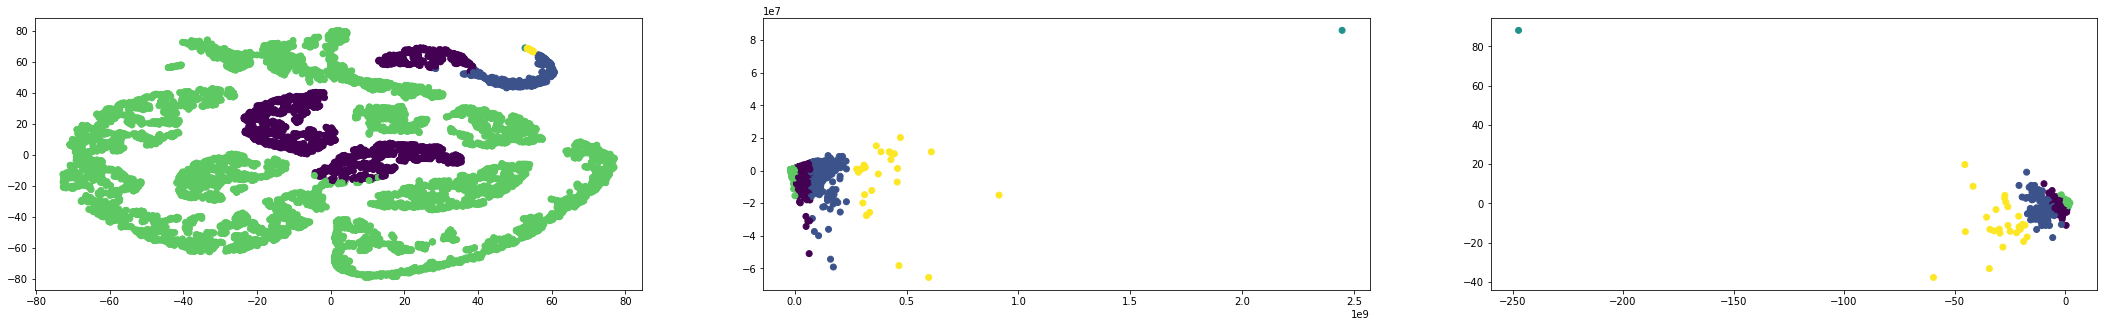

In [36]:
## Draw clusters 
plt.figure(figsize=(50, 5))
plt.subplot(141)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
plt.subplot(142)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
#plt.subplot(143)
#plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)
plt.subplot(143)
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y)


,SVD1,SVD2
0,-0.006615,0.012173
1,-0.000006,-0.000004
2,-0.003497,0.001262
3,-0.001984,0.009489
4,-0.007032,-0.002619


Text(0.5, 0, 'SVD 1')

Text(0, 0.5, 'SVD 2')

Text(0.5, 1.0, 'SVD')

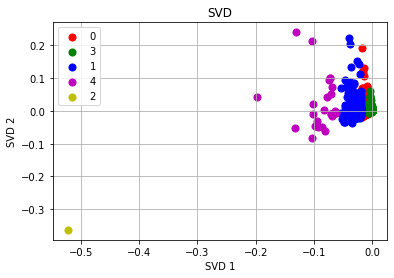

In [49]:
## SVD transformation to 2 dim space

from numpy.linalg import *
n = 2 # We will take two Singular Values
U, s, V = linalg.svd( dt1[ATTR_NAMES] )
# eye() creates a matrix with ones on the diagonal and zeros 
Sig = np.mat(np.eye(n)*s[:n])
newdata = U[:,:n]
newdata = pd.DataFrame(newdata)
newdata.columns=['SVD1','SVD2']
newdata.head()

newdata['target']=y
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('SVD 1') 
ax.set_ylabel('SVD 2') 
ax.set_title('SVD') 
targets = y.unique()
colors = ['r', 'g', 'b', 'm', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = newdata['target'] == target
    ax.scatter(newdata.loc[indicesToKeep, 'SVD1']
 , newdata.loc[indicesToKeep, 'SVD2']
 , c = color
 , s = 50)
ax.legend(targets)
ax.grid()


## Explanation model on decision trees

Automatically created module for IPython interactive environment


DecisionTreeClassifier(max_depth=3)

<Figure size 3600x1440 with 0 Axes>

Text(0.5, 0, 'data')

Text(0, 0.5, 'target')

Text(0.5, 1.0, 'Decision Tree Regression')

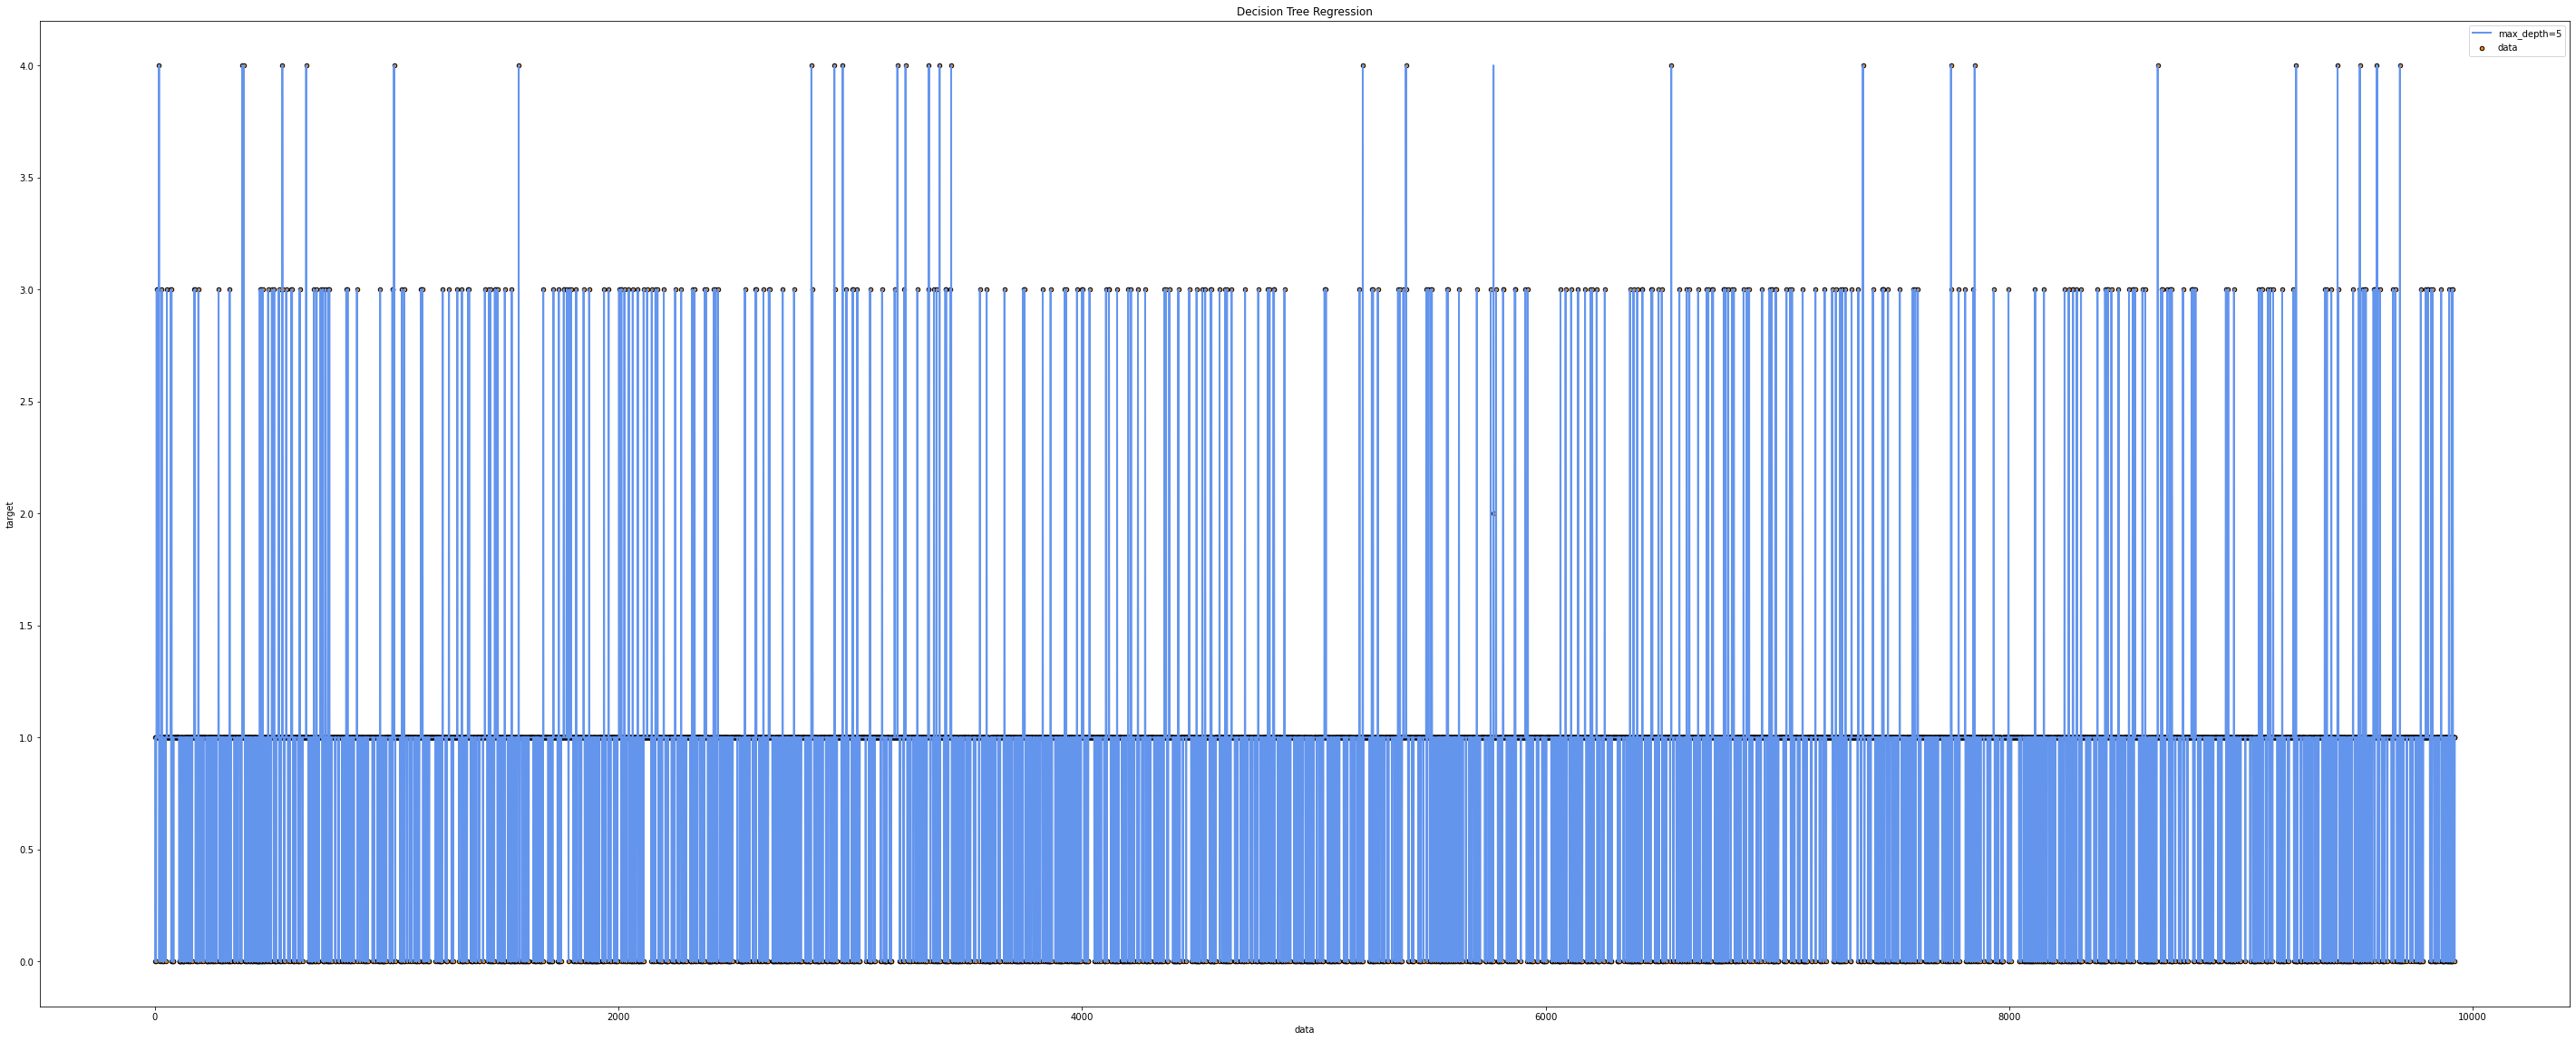

In [23]:
print(__doc__)

# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

X = dt1[ATTR_NAMES]
y = dt1['class']

# Fit regression model
t1 = DecisionTreeClassifier(max_depth=3)
t1.fit(X, y)

# Predict
y_1 = t1.predict(X)


# Plot the results
plt.figure(figsize=(50, 20))
plt.scatter(X.index, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X.index, y_1, color="cornflowerblue",
         label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [28]:
## Check prediction
dt1['pred'] = y_1
dt1[dt1['class'] !=dt1['pred']]

,q,sum_g_0,snum_l_0,rev_sum,rev_avg,rev_min,rev_max,vol_sum,vol_avg,vol_min,vol_max,dur_sum,dur_avg,dur_min,dur_max,mb_sum,mb_avg,mb_min,mb_max,cdr_sum,cdr_avg,cdr_min,cdr_max,free_traf_sum,free_traf_avg,free_traf_min,class,pred
5775,98.0,2.0,96.0,2000.0,20.408163,0.0,1000.0,2.408458e+06,24576.098139,0.24414,91029.29685,0.0,0.0,0.0,0.0,2.407821e+06,24569.605977,0.0,91009.039063,2.465609e+09,2.515928e+07,0.0,93193256.0,2.407852e+06,24569.922303,0.0,2.0,4.0


In [82]:
!pip install graphviz

In [24]:
dt1.groupby(by  = 'class').agg({'class':len})

,class
class,
0.0,1800.0
1.0,7774.0
2.0,1.0
3.0,322.0
4.0,27.0


'billings.pdf'

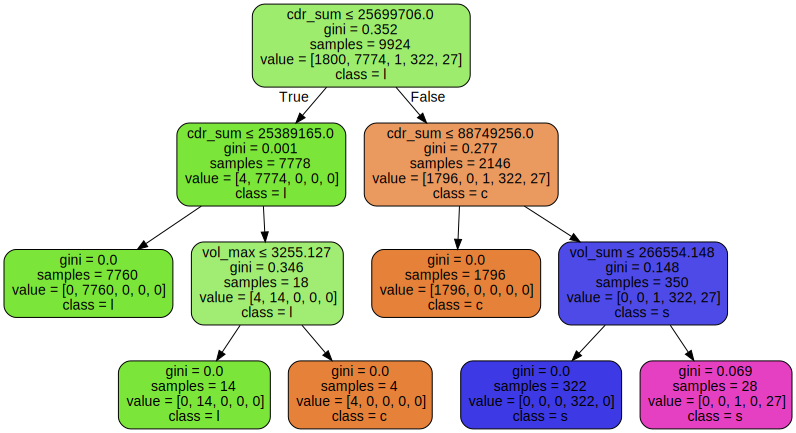

In [25]:
import graphviz 
# Do it 1st time when want to use graphvis
#import os
#os.environ["PATH"] += os.pathsep + "C:\\Program Files\\Graphviz\\bin\\"

dot_data = tree.export_graphviz(t1, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("billings") 

dot_data = tree.export_graphviz(t1, out_file=None, 
feature_names=ATTR_NAMES,  
class_names='class',  
filled=True, rounded=True,  
special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [77]:
import itertools as it
cCombIt = it.combinations(list(range(n_classes)), 2) 
print(*cCombIt)

(0, 1) (0, 2) (0, 3) (0, 4) (1, 2) (1, 3) (1, 4) (2, 3) (2, 4) (3, 4)


In [76]:
#list(it.combinations('ABCD', 2))
cCombIt =  it.combinations('ABCD', 2)
[*cCombIt][1][1]

'C'

In [63]:
n_classes = 5

In [57]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import itertools as it


# Parameters

cCombIt = it.combinations(list(range(n_classes)), 2) 

plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate(*cCombIt):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = dT

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()

array([   0,    1,    2, ..., 9921, 9922, 9923], dtype=int64)